In [4]:
pip install yfinance

In [5]:
import yfinance

In [6]:
from datetime import datetime

end_date = datetime.now()
start_date = datetime(end_date.year - 15, end_date.month, end_date.day)

In [7]:
print(start_date, end_date)

2010-07-02 00:00:00 2025-07-02 08:30:42.881756


In [8]:
stock_name = "AAPL"

stock_data = yfinance.download(stock_name, start_date, end_date)

/tmp/ipython-input-8-3749779062.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yfinance.download(stock_name, start_date, end_date)
[*********************100%***********************]  1 of 1 completed


In [9]:
stock_data.head(10)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-07-02,7.421583,7.541499,7.309179,7.528274,693842800
2010-07-06,7.472373,7.597698,7.398138,7.543601,615235600
2010-07-07,7.774117,7.777123,7.506035,7.528274,654556000
2010-07-08,7.756685,7.901246,7.660512,7.888623,738144400
2010-07-09,7.802669,7.811084,7.668627,7.720620,433322400
2010-07-12,7.732641,7.869688,7.659610,7.769908,562878400
2010-07-13,7.567645,7.705894,7.406254,7.703491,1190924000
2010-07-14,7.595592,7.687858,7.483490,7.494911,812047600


In [10]:
stock_data.shape

(3772, 5)

In [11]:
stock_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,3772.000000,3772.000000,3772.000000,3772.000000,3.772000e+03
mean,74.287845,75.029523,73.470270,74.224253,2.090812e+08
std,69.704278,70.396350,68.921053,69.623360,1.966476e+08
min,7.210900,7.291446,7.079564,7.154098,2.323470e+07
25%,19.428493,19.559709,19.219998,19.353377,8.030078e+07
50%,38.939798,39.368042,38.333154,38.870059,1.307144e+08
75%,139.146286,140.982288,136.590580,139.095770,2.753778e+08
max,258.396667,259.474086,257.010028,257.568678,1.880998e+09


In [12]:
stock_data.isna().sum()

,,0
Price,Ticker,
Close,AAPL,0
High,AAPL,0
Low,AAPL,0
Open,AAPL,0
Volume,AAPL,0


In [13]:
import matplotlib.pyplot as plt

<Axes: xlabel='Date'>

<Figure size 2000x1000 with 0 Axes>

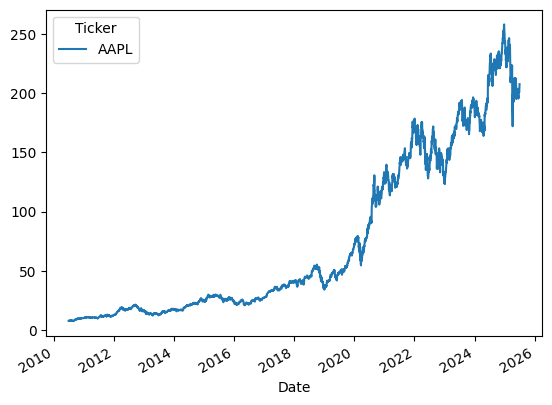

In [14]:
plt.figure(figsize = (20, 10))
stock_data["Close"].plot()

In [15]:
data_close = stock_data["Close"]
data_open = stock_data["Open"]

In [16]:
data_close, data_open

(Ticker            AAPL
 Date                  
 2010-07-02    7.421583
 2010-07-06    7.472373
 2010-07-07    7.774117
 2010-07-08    7.756685
 2010-07-09    7.802669
 ...                ...
 2025-06-25  201.559998
 2025-06-26  201.000000
 2025-06-27  201.080002
 2025-06-30  205.169998
 2025-07-01  207.820007
 
 [3772 rows x 1 columns],
 Ticker            AAPL
 Date                  
 2010-07-02    7.528274
 2010-07-06    7.543601
 2010-07-07    7.528274
 2010-07-08    7.888623
 2010-07-09    7.720620
 ...                ...
 2025-06-25  201.449997
 2025-06-26  201.429993
 2025-06-27  201.889999
 2025-06-30  202.009995
 2025-07-01  206.669998
 
 [3772 rows x 1 columns])

In [17]:
sma_10 = data_close.rolling(10).mean()
sma_50 = data_close.rolling(50).mean()

sma_10, sma_50

(Ticker            AAPL
 Date                  
 2010-07-02         NaN
 2010-07-06         NaN
 2010-07-07         NaN
 2010-07-08         NaN
 2010-07-09         NaN
 ...                ...
 2025-06-25  198.942999
 2025-06-26  199.164999
 2025-06-27  199.353000
 2025-06-30  200.225000
 2025-07-01  201.165001
 
 [3772 rows x 1 columns],
 Ticker            AAPL
 Date                  
 2010-07-02         NaN
 2010-07-06         NaN
 2010-07-07         NaN
 2010-07-08         NaN
 2010-07-09         NaN
 ...                ...
 2025-06-25  202.572874
 2025-06-26  202.547778
 2025-06-27  202.531873
 2025-06-30  202.754961
 2025-07-01  202.976921
 
 [3772 rows x 1 columns])

In [18]:
data_close = data_close.iloc[49:].reset_index(drop=True)

sma_10 = sma_10.iloc[49:].reset_index(drop=True)
sma_50 = sma_50.iloc[49:].reset_index(drop=True)

In [19]:
sma_10, sma_50, data_close

(Ticker        AAPL
 0         7.697238
 1         7.774057
 2         7.855564
 3         7.934426
 4         8.004152
 ...            ...
 3718    198.942999
 3719    199.164999
 3720    199.353000
 3721    200.225000
 3722    201.165001
 
 [3723 rows x 1 columns],
 Ticker        AAPL
 0         7.639834
 1         7.652529
 2         7.665507
 3         7.676266
 4         7.686653
 ...            ...
 3718    202.572874
 3719    202.547778
 3720    202.531873
 3721    202.754961
 3722    202.976921
 
 [3723 rows x 1 columns],
 Ticker        AAPL
 0         8.025669
 1         8.056327
 2         8.121243
 3         8.312089
 4         8.276021
 ...            ...
 3718    201.559998
 3719    201.000000
 3720    201.080002
 3721    205.169998
 3722    207.820007
 
 [3723 rows x 1 columns])

In [20]:
data_prev_close = data_close

data_close = data_close.shift(-1)

In [21]:
data_close = data_close.iloc[:-1]

In [22]:
data_prev_close = data_prev_close.iloc[:-1]

sma_10 = sma_10.iloc[:-1]
sma_50 = sma_50.iloc[:-1]

In [23]:
data_prev_close, sma_10, sma_50, data_close

(Ticker        AAPL
 0         8.025669
 1         8.056327
 2         8.121243
 3         8.312089
 4         8.276021
 ...            ...
 3717    200.300003
 3718    201.559998
 3719    201.000000
 3720    201.080002
 3721    205.169998
 
 [3722 rows x 1 columns],
 Ticker        AAPL
 0         7.697238
 1         7.774057
 2         7.855564
 3         7.934426
 4         8.004152
 ...            ...
 3717    199.053999
 3718    198.942999
 3719    199.164999
 3720    199.353000
 3721    200.225000
 
 [3722 rows x 1 columns],
 Ticker        AAPL
 0         7.639834
 1         7.652529
 2         7.665507
 3         7.676266
 4         7.686653
 ...            ...
 3717    202.499484
 3718    202.572874
 3719    202.547778
 3720    202.531873
 3721    202.754961
 
 [3722 rows x 1 columns],
 Ticker        AAPL
 0         8.056327
 1         8.121243
 2         8.312089
 3         8.276021
 4         8.512248
 ...            ...
 3717    201.559998
 3718    201.000000
 3719    201.080

In [24]:
import pandas as pd

X = pd.concat([data_prev_close, sma_10, sma_50], axis=1)
y = data_close

In [25]:
X, y

(Ticker        AAPL        AAPL        AAPL
 0         8.025669    7.697238    7.639834
 1         8.056327    7.774057    7.652529
 2         8.121243    7.855564    7.665507
 3         8.312089    7.934426    7.676266
 4         8.276021    8.004152    7.686653
 ...            ...         ...         ...
 3717    200.300003  199.053999  202.499484
 3718    201.559998  198.942999  202.572874
 3719    201.000000  199.164999  202.547778
 3720    201.080002  199.353000  202.531873
 3721    205.169998  200.225000  202.754961
 
 [3722 rows x 3 columns],
 Ticker        AAPL
 0         8.056327
 1         8.121243
 2         8.312089
 3         8.276021
 4         8.512248
 ...            ...
 3717    201.559998
 3718    201.000000
 3719    201.080002
 3720    205.169998
 3721    207.820007
 
 [3722 rows x 1 columns])

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
X_train.shape[1]

3

In [29]:
from keras.models import Sequential
from keras.layers import Dense

In [30]:
model = Sequential()

model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,369 (9.25 KB)

 Trainable params: 2,369 (9.25 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), verbose=1)

Epoch 1/200
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1705.5350 - val_loss: 26758.5605
Epoch 2/200
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1205.4543 - val_loss: 11728.3994
Epoch 3/200
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 284.9184 - val_loss: 2565.6846
Epoch 4/200
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 93.6991 - val_loss: 1271.4930
Epoch 5/200
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 53.9536 - val_loss: 576.2736
Epoch 6/200
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.5424 - val_loss: 210.1782
Epoch 7/200
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.6168 - val_loss: 56.7786
Epoch 8/200
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.7778 - val_loss: 32.4626
Epoch 9/200
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.7268 - val_loss: 33.8701
Epoch 10/200
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.0660 - val_loss: 37.9510
Epoch 11/200
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4883 - val_loss: 51.4688
Epoch 12/200
82/82 ━━━━━━━━━

In [33]:
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.9721 
Test Loss: 10.976149559020996


In [34]:
y_predicted = model.predict(X_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [35]:
pred_df = pd.DataFrame(y_predicted.flatten())

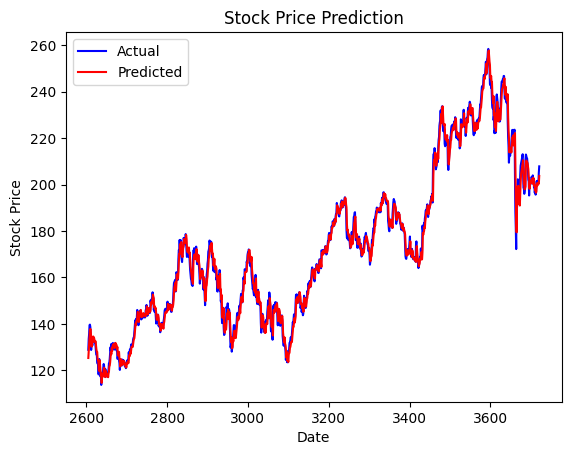

In [36]:
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, pred_df, label='Predicted', color='red')
plt.legend()
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [37]:
model.save("model.h5")